In [1]:
import numpy as np # linear algebra
import pandas as pd


train = pd.read_csv("train.csv")
#test=pd.read_csv("test.csv")
members=pd.read_csv("members.csv")
songs=pd.read_csv("songs.csv")
print('train',train.shape)
#print('test',test.shape)
print('members',members.shape)
print('songs',songs.shape)

train (7377418, 6)
members (34403, 7)
songs (2296320, 7)


In [2]:
print('train table')
print(train.head(5))

print('members table')
print(members.head(5))

print('songs table')
print(songs.head(5))

train table
                                           msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
2  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
3  Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=   
4  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=        my library   
2  JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=        my library   
3  2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=        my library   
4  3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=           explore   

    source_screen_name      source_type  target  
0              Explore  online-playlist       1  
1  Local playlist more   local-playlist       1  
2  Local playlist more   local-playlist       1  
3  Local playlist more   local-playlist       1  
4              E

In [3]:
memory = train.memory_usage(index=True).sum()
print("Memory consumed by train dataframe : {} MB" .format(memory/ 1024**2))

Memory consumed by train dataframe : 337.7114715576172 MB


In [5]:
train['target'] = train['target'].astype(np.int8)
#test['id'] = test['id'].astype(np.int32)
members['city'] = members['city'].astype(np.int8)
members['bd'] = members['bd'].astype(np.int16)
members['registered_via'] = members['registered_via'].astype(np.int8)
members['registration_init_time'] = members['registration_init_time'].astype(np.int32)
members['expiration_date'] = members['expiration_date'].astype(np.int32)

songs['song_length'] = songs['song_length'].astype(np.int32)

#-- Since language column contains Nan values we will convert it to 0,
#-- After converting the type of the column we will revert it back to nan
songs['language'] = songs['language'].fillna(0)
songs['language'] = songs['language'].astype(np.int8)

songs['language'] = songs['language'].replace(0, np.nan)

In [6]:
train_members = pd.merge(train, members, on='msno', how='inner')
train_merged = pd.merge(train_members, songs, on='song_id', how='outer')
print(train_merged.head())
print(len(train_merged.columns))
print('\n')
#--- Performing the same for test set ---
#test_members = pd.merge(test, members, on='msno', how='inner')
#test_merged = pd.merge(test_members, songs, on='song_id', how='outer')

                                           msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=   
2  xbodnNBaLMyqqI7uFJlvHOKMJaizuWo/BB/YHZICcKo=   
3  s0ndDsjI79amU0RBiullFN8HRz9HjE++34jGNa7zJ/s=   
4  Vw4Umh6/qlsJDC/XMslyAxVvRgFJGHr53yb/nrmY1DU=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=          discover   
2  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=        my library   
3  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=        my library   
4  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=        my library   

     source_screen_name      source_type  target  city    bd  gender  \
0               Explore  online-playlist     1.0   1.0   0.0     NaN   
1  Online playlist more  online-playlist     0.0  15.0  18.0    male   
2   Local playlist more    local-library     1.0   1.0   0.0  

In [7]:
print(train.target.value_counts()*100/train.target.value_counts().sum())
print('How many unique songs ',len(train.song_id.unique()))

1    50.351708
0    49.648292
Name: target, dtype: float64
How many unique songs  359966


In [8]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (15, 6)
repeats=train[train.target==1]
song_repeats=repeats.groupby('song_id',as_index=False).msno.count()
song_repeats.columns=['song_id','count']

song_repeats=pd.DataFrame(song_repeats).merge(songs,left_on='song_id',right_on='song_id')
print('median length of songs repeated',song_repeats.sort_values(by='count',ascending=False)[:2000].song_length.median())
print('median length of songs repeated',songs.song_length.median())

median length of songs repeated 246647.5
median length of songs repeated 226627.0


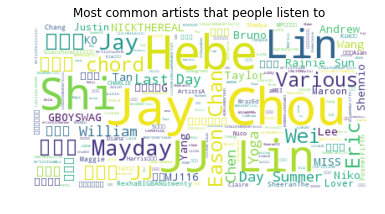

In [9]:
import matplotlib.pyplot as plt    
from wordcloud import WordCloud

# How to represent Chinese adn other languages
def displaywc(txt,title):
    text=""
    for i in g:
        text+=str(i)
    wordcloud = WordCloud(background_color='white', max_font_size = 60).generate(text)

    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()
    
g=song_repeats.sort_values(by='count',ascending=False)[:200].artist_name.tolist()
text=""
displaywc(text,'Most common artists that people listen to ')

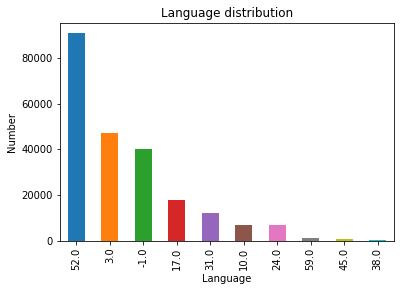

In [10]:
df=pd.DataFrame(song_repeats.sort_values(by='count',ascending=False))
df.language.value_counts().plot(kind='bar')


plt.title('Language distribution')
plt.ylabel('Number')
plt.xlabel('Language')
plt.show()

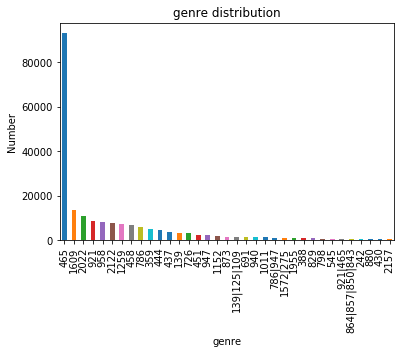

In [11]:
df.genre_ids.value_counts()[:35].plot(kind='bar')

plt.title('genre distribution')
plt.xlabel('genre')
plt.ylabel('Number')

plt.show()

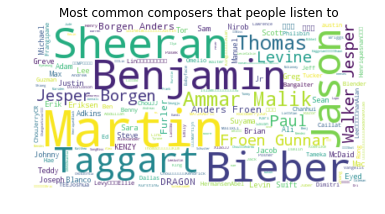

In [12]:
g=song_repeats.sort_values(by='count',ascending=False)[:200].composer.tolist()
#TODO Investigate how to display chinese
text=""

displaywc(text,'Most common composers that people listen to ')


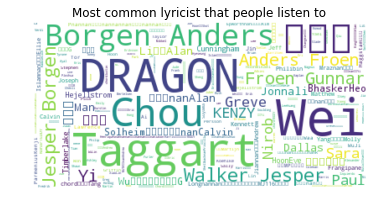

In [13]:
g=song_repeats.sort_values(by='count',ascending=False)[:200].lyricist.tolist()
#TODO Investigate how to display chinese
text=""
#for i in g:
#    text+=str(i)
displaywc(text,'Most common lyricist that people listen to ')

In [14]:
print('Users who listen to the same song for many times')
repeats.msno.value_counts()[:10]


Users who listen to the same song for many times


o+5RNlSWrzvrphgBNGIo1FLkGxBgyICns6qXj3nS7Pk=    3288
KGXNZ/H3VxvET/+rGxlrAe7Gpz2eKMXyuSg3xh8Ij1M=    2818
FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=    2791
MXIMDXO0j3UpaT7FvOSGW6Y5zfhlh+xYjTqGoUdMzEE=    2069
dU4RbzpIRRd/EkA9Xncpy9CglzDBZp7nKMfdnfr3Aj8=    1978
4DlS5LiANEKlMTQD08dakyV1JWwPYI/n1wyjx4ImjPc=    1814
JkQacE3rvmhh65R04eDLbu+M7MCkpzmHwMGrbZo0puc=    1806
uCDJmSDTzA5PpnYGqKvNmFbwBIoS3jIXFbO5YfoCv/Y=    1794
1wiu2UfN0BNhHfPTrDS3S/rQkX/vnwDoKH6ODTUdH9k=    1737
cqjRBV/jWN2ujhc+z/4tz+Mj6xEfflAAt6qBXCqxKvw=    1735
Name: msno, dtype: int64

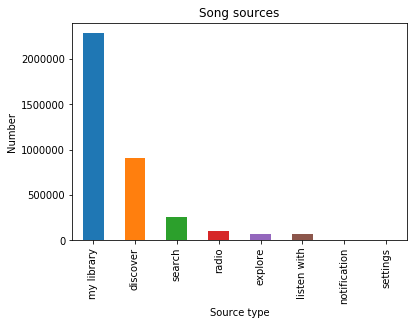

In [15]:
repeats.source_system_tab.value_counts().plot(kind='bar')


plt.title('Song sources')
plt.xlabel('Source type')
plt.ylabel('Number')

plt.show()

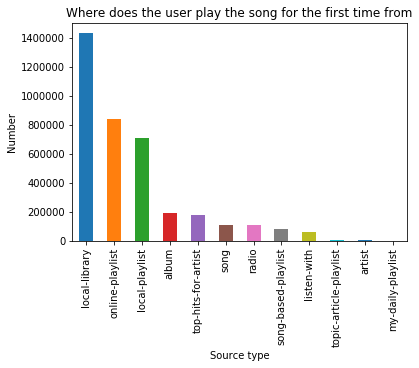

In [16]:
repeats.source_type.value_counts().plot(kind='bar')
plt.title('Where does the user play the song for the first time from')
plt.xlabel('Source type')
plt.ylabel('Number')
plt.show()

In [17]:
user_repeats=repeats.merge(members,left_on='msno',right_on='msno',how='left')
print("repeated users")
user_repeats.msno.value_counts()[:20]

repeated users


o+5RNlSWrzvrphgBNGIo1FLkGxBgyICns6qXj3nS7Pk=    3288
KGXNZ/H3VxvET/+rGxlrAe7Gpz2eKMXyuSg3xh8Ij1M=    2818
FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=    2791
MXIMDXO0j3UpaT7FvOSGW6Y5zfhlh+xYjTqGoUdMzEE=    2069
dU4RbzpIRRd/EkA9Xncpy9CglzDBZp7nKMfdnfr3Aj8=    1978
4DlS5LiANEKlMTQD08dakyV1JWwPYI/n1wyjx4ImjPc=    1814
JkQacE3rvmhh65R04eDLbu+M7MCkpzmHwMGrbZo0puc=    1806
uCDJmSDTzA5PpnYGqKvNmFbwBIoS3jIXFbO5YfoCv/Y=    1794
1wiu2UfN0BNhHfPTrDS3S/rQkX/vnwDoKH6ODTUdH9k=    1737
cqjRBV/jWN2ujhc+z/4tz+Mj6xEfflAAt6qBXCqxKvw=    1735
7xiBI5xU3P2/IiR9teB7jySfzWo96JGikGajteLd3Cs=    1715
HVcWdf8CEo9s6qwt5V7TpoPYJfRlQSTA6b7kxEAImpc=    1710
mDJCU+fKu/mbdk9l4SmPYiJwpeMyK44o9wmG1X3735A=    1607
V39VxDdE9SgMQZnX58oQChm9W056pw2lC3TiifMfkKw=    1602
LThaiVqGGnVTPmTcmwN/LLo4fVb5dzkduzd7s1SgzIA=    1578
EZmIP7zKgqKwpEHnuDjRIkzCmcLNlHn4hkiglZ5LxK8=    1539
00qmlWC3H/cjf2Ig1li5xIO0VNDRgBX0f9ilouDBEZs=    1533
x+k/zTEqdgYq6O+r1iDjKRaQnaCS5118gzBe8c12r1Y=    1503
K7obY5lUlZTd6a/byE9NG/e7Q/dlgHfppLbYk8OL7os=  

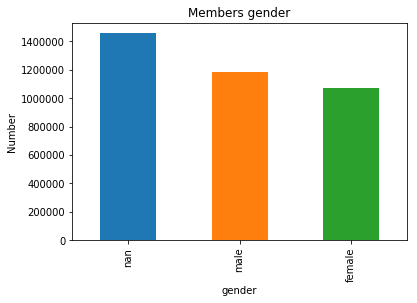

In [18]:
user_repeats.gender.value_counts(dropna=False).plot(kind='bar')
plt.title('Members gender')
plt.xlabel('gender')
plt.ylabel("Number")
plt.show()

In [19]:
train_members = pd.merge(train, members, on='msno', how='inner')
train_merged = pd.merge(train_members, songs, on='song_id', how='outer')
print(train_merged.head())
print(len(train_merged.columns))
print('\n')

                                           msno  \
0  FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=   
1  pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=   
2  xbodnNBaLMyqqI7uFJlvHOKMJaizuWo/BB/YHZICcKo=   
3  s0ndDsjI79amU0RBiullFN8HRz9HjE++34jGNa7zJ/s=   
4  Vw4Umh6/qlsJDC/XMslyAxVvRgFJGHr53yb/nrmY1DU=   

                                        song_id source_system_tab  \
0  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=           explore   
1  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=          discover   
2  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=        my library   
3  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=        my library   
4  BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=        my library   

     source_screen_name      source_type  target  city    bd  gender  \
0               Explore  online-playlist     1.0   1.0   0.0     NaN   
1  Online playlist more  online-playlist     0.0  15.0  18.0    male   
2   Local playlist more    local-library     1.0   1.0   0.0  

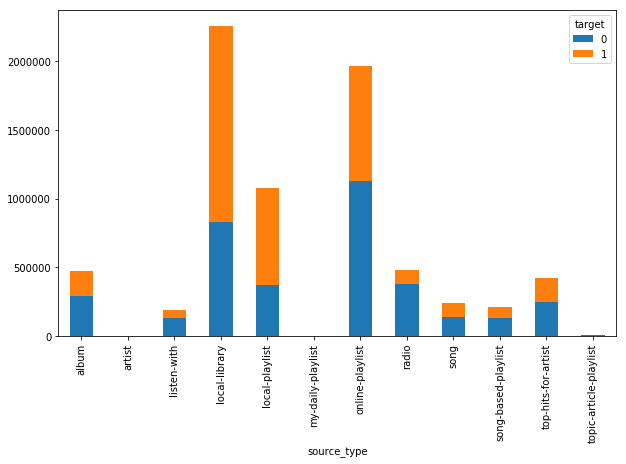

In [21]:
ct = pd.crosstab(train.source_type, train.target)
ct.plot.bar(figsize = (10, 6), stacked=True)
plt.show()